In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv("loan_approval_data.csv")
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [4]:
df=df.drop("Applicant_ID",axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_Income    950 non-null    float64
 1   Coapplicant_Income  950 non-null    float64
 2   Employment_Status   950 non-null    object 
 3   Age                 950 non-null    float64
 4   Marital_Status      950 non-null    object 
 5   Dependents          950 non-null    float64
 6   Credit_Score        950 non-null    float64
 7   Existing_Loans      950 non-null    float64
 8   DTI_Ratio           950 non-null    float64
 9   Savings             950 non-null    float64
 10  Collateral_Value    950 non-null    float64
 11  Loan_Amount         950 non-null    float64
 12  Loan_Term           950 non-null    float64
 13  Loan_Purpose        950 non-null    object 
 14  Property_Area       950 non-null    object 
 15  Education_Level     950 non-null    object 
 16  Gender 

In [5]:
df.isnull().sum()


Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

# Handle Missing Values

In [6]:
# numerical_col=df.select_dtypes(include=["float64","int64"]).columns
# or 
numerical_col=df.select_dtypes(include=["number"]).columns
categorical_col=df.select_dtypes(include=["object"]).columns


In [7]:
numerical_col

Index(['Applicant_Income', 'Coapplicant_Income', 'Age', 'Dependents',
       'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term'],
      dtype='object')

# Filling Null values using Imputer

In [8]:
#For Numericl columns
from sklearn.impute import SimpleImputer
num_imp=SimpleImputer(strategy="mean")
df[numerical_col]=num_imp.fit_transform(df[numerical_col])

In [9]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,NaN,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [10]:
#For Categorical columns
from sklearn.impute import SimpleImputer
cat_imp=SimpleImputer(strategy="most_frequent")
df[categorical_col]=cat_imp.fit_transform(df[categorical_col])

In [11]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


# EDA Explortory Data Analysis

In [12]:
#differance of loan approve
(df["Loan_Approved"] == "Yes").sum()

np.int64(298)

In [13]:
(df["Loan_Approved"] == "No").sum()

np.int64(702)

Text(0.5, 1.0, 'Loan approved ')

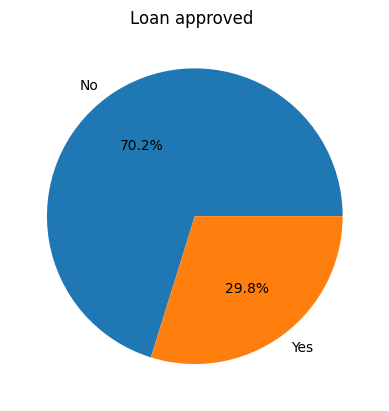

In [14]:
count_values=df["Loan_Approved"].value_counts()
plt.pie(count_values,labels=["No","Yes"],autopct="%1.1f%%")
plt.title("Loan approved ")

[Text(0, 0, '621'), Text(0, 0, '379')]

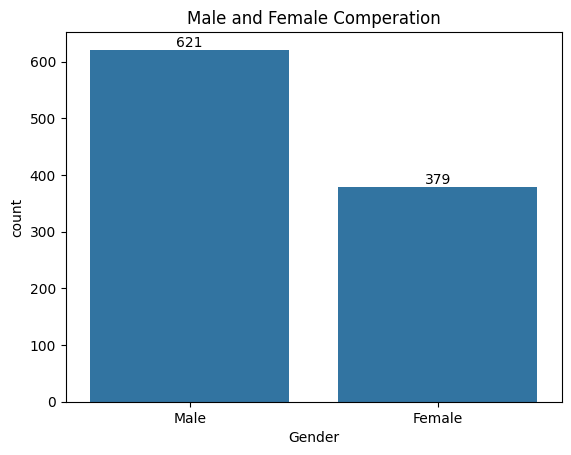

In [15]:
gender_count=df["Gender"].value_counts()
ax=sns.barplot(gender_count)
ax.set_title("Male and Female Comperation")
ax.bar_label(ax.containers[0])

Text(0.5, 1.0, 'Loan Approvel Compertion between Male and Female')

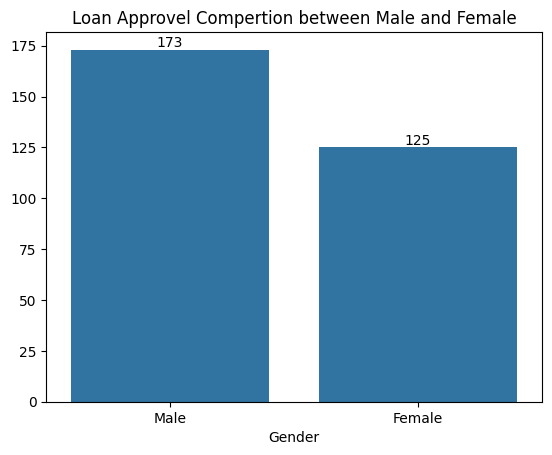

In [16]:
gender_count=df["Gender"].value_counts()
loan_approv_count=df[df["Loan_Approved"]=="Yes"]["Gender"].value_counts()
ax=sns.barplot(x=gender_count.index,y=loan_approv_count.values)
ax.bar_label(ax.containers[0])
ax.set_title("Loan Approvel Compertion between Male and Female" )

[Text(0, 0, '722'), Text(0, 0, '278')]

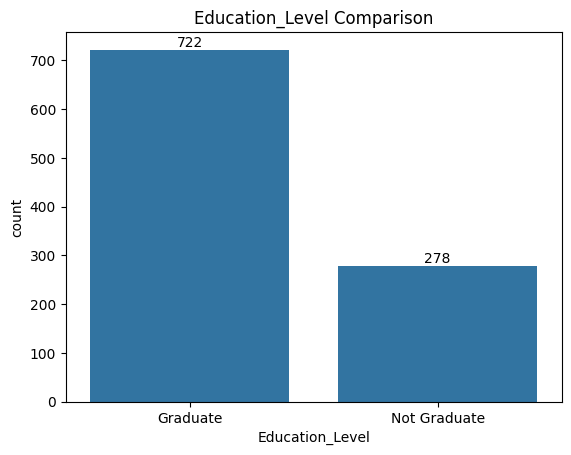

In [17]:
edu_count=df["Education_Level"].value_counts()
ax=sns.barplot(edu_count)
ax.set_title("Education_Level Comparison")
ax.bar_label(ax.containers[0])

Text(0.5, 1.0, 'Applicant Monetely Income')

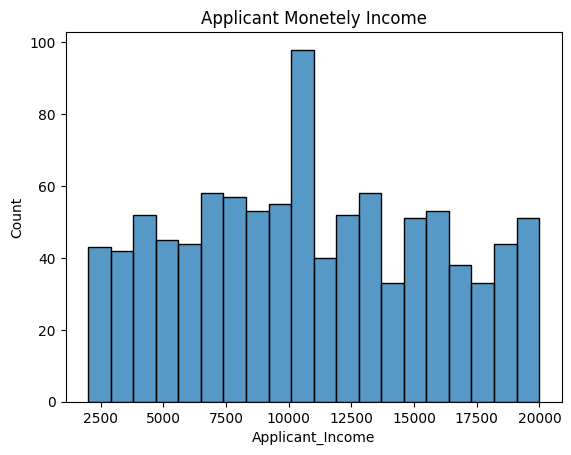

In [18]:
# Income Analysis

ax=sns.histplot(
    data=df,
    x="Applicant_Income",
    bins=20
)
ax.set_title("Applicant Monetely Income")

Text(0.5, 1.0, 'Co-Applicant Monetely Income')

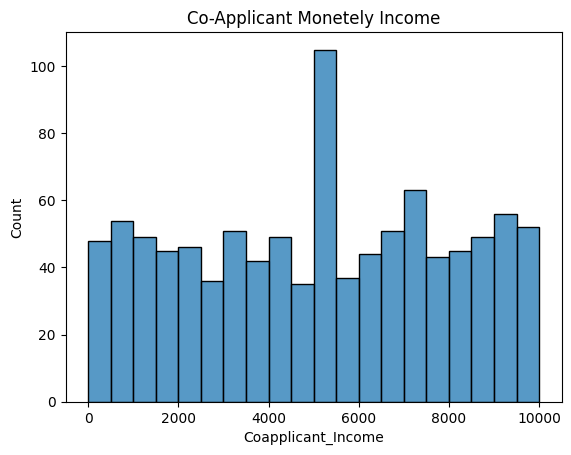

In [19]:
ax=sns.histplot(
    data=df,
    x="Coapplicant_Income",
    bins=20
)
ax.set_title("Co-Applicant Monetely Income")

Text(0.5, 1.0, 'Outliers detection between Loan approved and applicant Income')

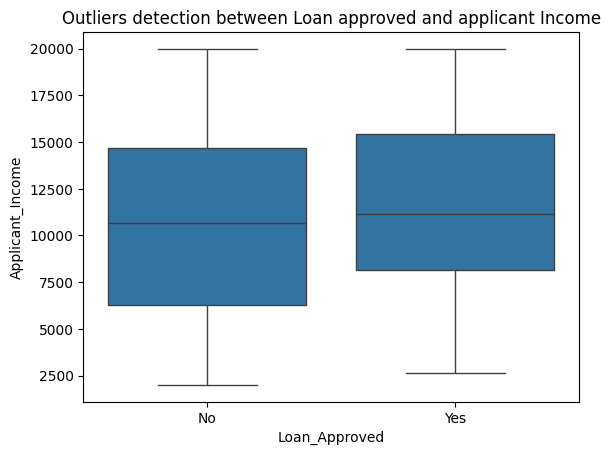

In [20]:
#outliers -box plot
ax=sns.boxplot(
    data=df,
    x="Loan_Approved",
    y="Applicant_Income"
)
ax.set_title("Outliers detection between Loan approved and applicant Income")

Text(0.5, 1.0, 'Outliers detection between Loan approved and applicant Income')

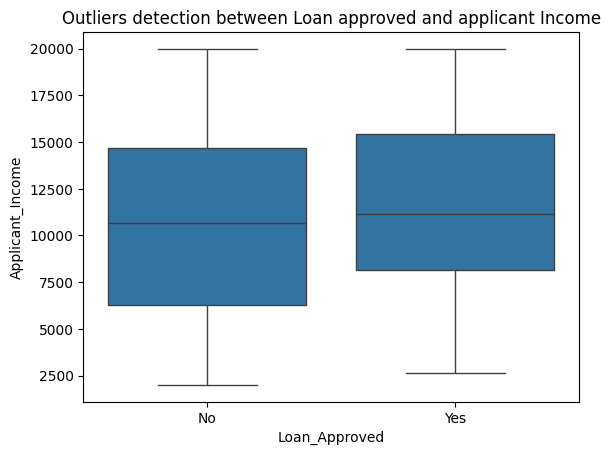

In [21]:
#outliers -box plot
ax=sns.boxplot(
    data=df,
    x="Loan_Approved",
    y="Applicant_Income"
)
ax.set_title("Outliers detection between Loan approved and applicant Income")

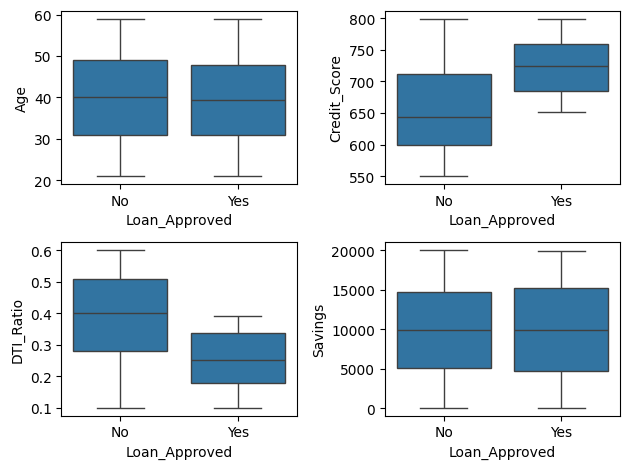

In [22]:
df.columns
fig,axes=plt.subplots(2,2)
sns.boxplot(ax=axes[0,0],data=df,x="Loan_Approved",y="Age")
sns.boxplot(ax=axes[0,1],data=df,x="Loan_Approved",y="Credit_Score")
sns.boxplot(ax=axes[1,0],data=df,x="Loan_Approved",y="DTI_Ratio")
sns.boxplot(ax=axes[1,1],data=df,x="Loan_Approved",y="Savings")
plt.tight_layout()

<Axes: xlabel='Credit_Score', ylabel='Count'>

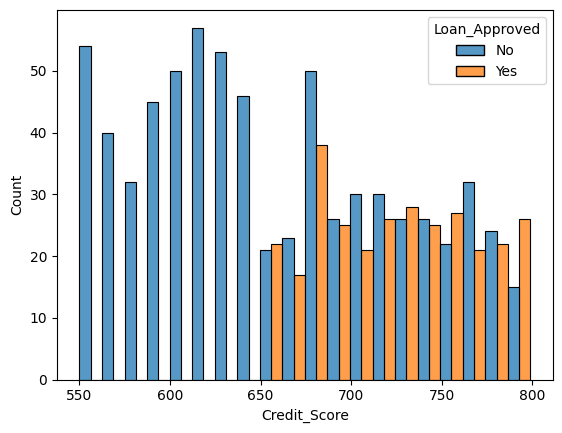

In [23]:
# comparison between Credit Score and Loan Approval
sns.histplot(
                data=df,
              x="Credit_Score",
              hue="Loan_Approved",
                bins=20,
    multiple="dodge"
                )

<Axes: xlabel='Applicant_Income', ylabel='Count'>

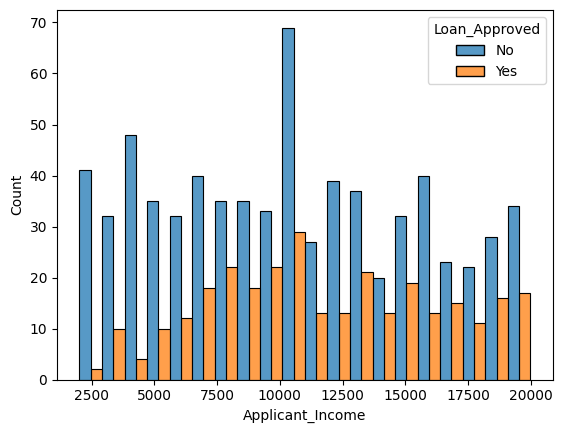

In [24]:
sns.histplot(
                data=df,
              x="Applicant_Income",
              hue="Loan_Approved",
                bins=20,
    multiple="dodge"
                )

# Feature Encoding

In [25]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


In [26]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [27]:
le=LabelEncoder()
df["Loan_Approved"]=le.fit_transform(df["Loan_Approved"])

In [33]:
df.head()
cols_ohe=["Employment_Status","Marital_Status","Loan_Purpose","Property_Area","Education_Level","Gender","Employer_Category"]
ohe=OneHotEncoder(drop="first",sparse_output=False,handle_unknown="ignore")
encoder_ohe=ohe.fit_transform(df[cols_ohe])
encoder_cols_ohe=pd.DataFrame(encoder_ohe,columns=ohe.get_feature_names_out(cols_ohe),index=df.index)
df=pd.concat([df.drop(columns=cols_ohe),encoder_cols_ohe],axis=1)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Applicant_Income                 1000 non-null   float64
 1   Coapplicant_Income               1000 non-null   float64
 2   Age                              1000 non-null   float64
 3   Dependents                       1000 non-null   float64
 4   Credit_Score                     1000 non-null   float64
 5   Existing_Loans                   1000 non-null   float64
 6   DTI_Ratio                        1000 non-null   float64
 7   Savings                          1000 non-null   float64
 8   Collateral_Value                 1000 non-null   float64
 9   Loan_Amount                      1000 non-null   float64
 10  Loan_Term                        1000 non-null   float64
 11  Loan_Approved                    1000 non-null   int64  
 12  Employment_Status_Sal

<!-- # Correlation Heatmap -->

In [37]:
# num_cols=df.select_dtypes(include="number")
# corr_matrix=num_cols.corr()

<Axes: >

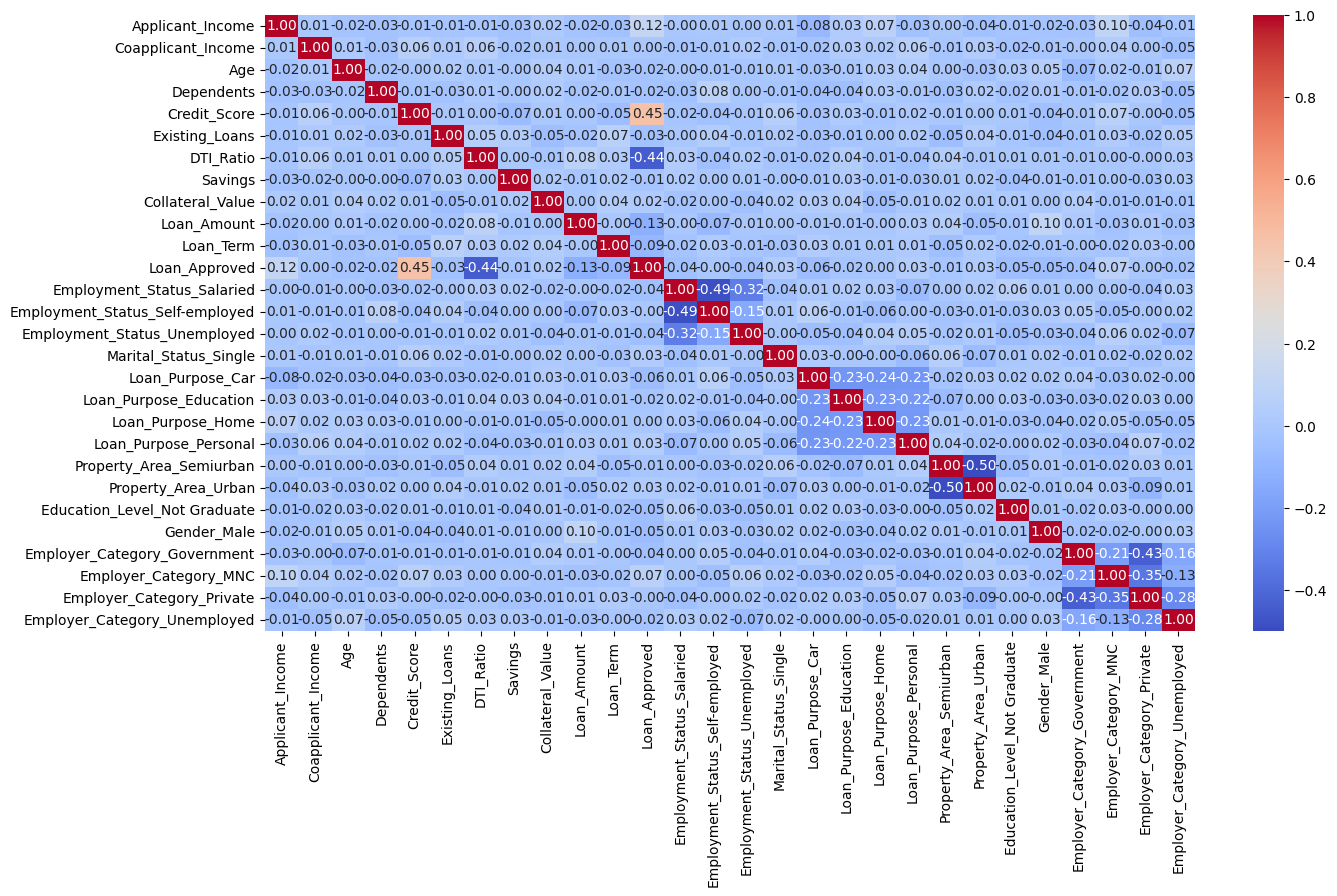

In [77]:
# plt.figure(figsize=(15,8))
# sns.heatmap(
#     corr_matrix,
#     annot=True,
#     fmt=".2f",
#     cmap="coolwarm"
# )

<!-- # Train Test Split + Feature Scaling -->

In [43]:
# X=df.drop(columns="Loan_Approved",axis=1)
# Y=df["Loan_Approved"]

In [46]:
# x_train,x_test,y_train,y_test=train_test_split(
#                                                 X,Y,
#                                                test_size=0.2,
#                                                random_state=42)

In [50]:
# scaler=StandardScaler()

In [51]:
# x_train=scaler.fit_transform(x_train)

In [52]:
# x_test=scaler.transform(x_test)

# KNN

In [55]:
# from sklearn.neighbors import KNeighborsClassifier

In [56]:
# knn_model=KNeighborsClassifier(n_neighbors=5)
# knn_model.fit(x_train,y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [57]:
y_pred=knn_model.predict(x_test)

# Evaluation Matrix

In [69]:
# from sklearn.metrics import accuracy_score,r2_score,precision_score,f1_score

In [70]:
# print(accuracy_score(y_test,y_pred))
# print(precision_score(y_test,y_pred))
# print(f1_score(y_test,y_pred))
# print(r2_score(y_test,y_pred))

0.76
0.6274509803921569
0.5714285714285714
-0.13220898690883343


<!-- # Logstic Regression -->

In [76]:
# from sklearn.linear_model import LogisticRegression

In [ ]:
# model=LogisticRegression()
# knn_model.fit(x_train,y_train)

In [ ]:
# y_pred=knn_model.predict(x_test)
# print(accuracy_score(y_test,y_pred))
# print(precision_score(y_test,y_pred))
# print(f1_score(y_test,y_pred))
# print(r2_score(y_test,y_pred))